In [79]:
import pandas as pd
import numpy as np

### OHLC data

In [80]:
df_OHLC = pd.read_csv("BTC_data_OHLC.csv")

In [81]:
df_OHLC.dtypes

Unnamed: 0                        int64
timestamp                        object
binance-linear/candle_close     float64
binance-linear/candle_high      float64
binance-linear/candle_low       float64
binance-linear/candle_open      float64
binance-linear/candle_volume    float64
dtype: object

In [82]:
# Define renaming dictionary
rename_map = {
    'binance-linear/candle_open': 'open',
    'binance-linear/candle_close': 'close',
    'binance-linear/candle_high': 'high',
    'binance-linear/candle_low': 'low',
    'binance-linear/candle_volume': 'volume'
}

# Apply renaming
df_OHLC.rename(columns=rename_map, inplace=True)

In [83]:
df_OHLC.drop(columns=["Unnamed: 0"], inplace=True)

In [84]:
df_OHLC

,timestamp,close,high,low,open,volume
0,2020-01-01 16:00:00,7241.91,7247.00,7210.81,7229.66,2453.810
1,2020-01-01 17:00:00,7233.80,7248.00,7221.88,7241.91,2477.807
2,2020-01-01 18:00:00,7237.47,7241.95,7222.00,7233.87,1827.668
3,2020-01-01 19:00:00,7226.35,7237.83,7223.15,7237.83,1028.577
4,2020-01-01 20:00:00,7233.30,7242.00,7223.09,7226.56,1476.534
...,...,...,...,...,...,...
26299,2023-01-01 11:00:00,16549.80,16549.80,16535.10,16542.90,3768.388
26300,2023-01-01 12:00:00,16553.90,16565.90,16542.90,16549.80,5482.001
26301,2023-01-01 13:00:00,16539.90,16559.80,16530.50,16553.80,4505.256
26302,2023-01-01 14:00:00,16533.10,16549.70,16533.10,16539.90,2448.444


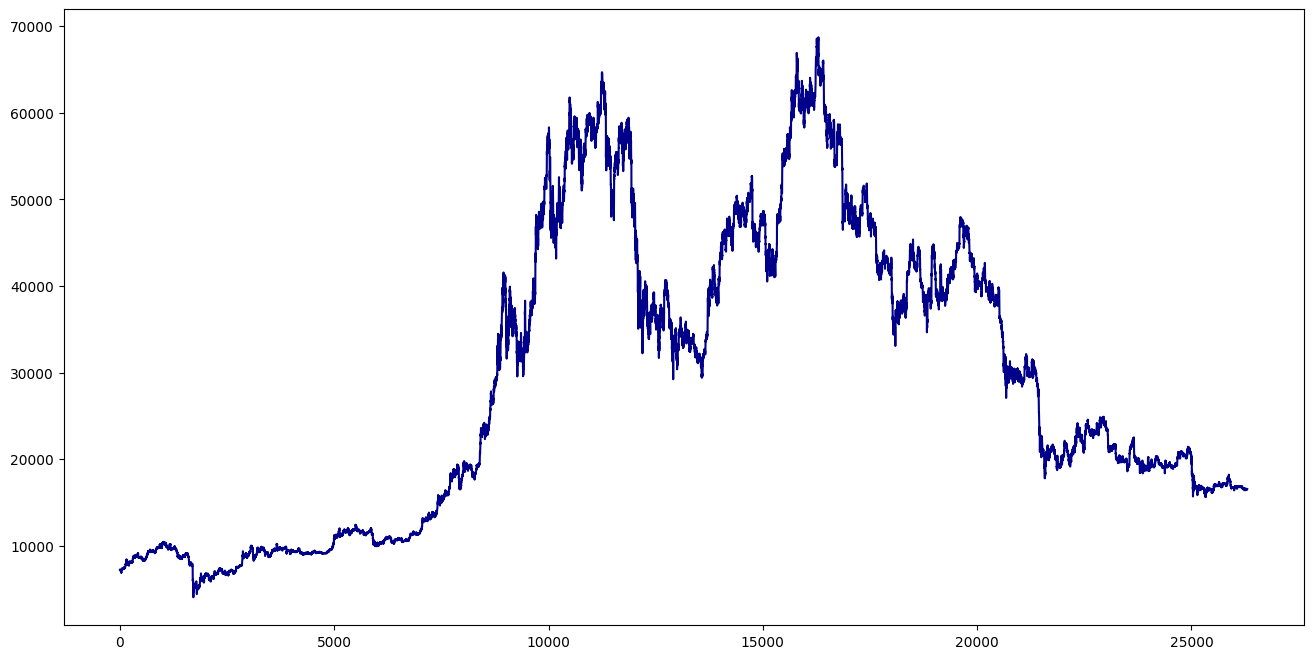

In [85]:
import matplotlib.pyplot as plt
df_OHLC['close'].plot(figsize = (16,8),color = 'darkblue');

In [86]:
df_OHLC['log_returns'] = np.log(df_OHLC['close'] / df_OHLC['close'].shift(1))
df_OHLC.dropna(inplace = True)
df_OHLC.head(5)

,timestamp,close,high,low,open,volume,log_returns
1,2020-01-01 17:00:00,7233.80,7248.00,7221.88,7241.91,2477.807,-0.001120
2,2020-01-01 18:00:00,7237.47,7241.95,7222.00,7233.87,1827.668,0.000507
3,2020-01-01 19:00:00,7226.35,7237.83,7223.15,7237.83,1028.577,-0.001538
4,2020-01-01 20:00:00,7233.30,7242.00,7223.09,7226.56,1476.534,0.000961
5,2020-01-01 21:00:00,7229.71,7238.79,7225.00,7233.32,1210.884,-0.000496


In [87]:
df_OHLC["timestamp"] = pd.to_datetime(df_OHLC["timestamp"])

In [88]:
df_OHLC.dtypes

timestamp      datetime64[ns]
close                 float64
high                  float64
low                   float64
open                  float64
volume                float64
log_returns           float64
dtype: object

### On-chain data

In [89]:
df_on_chain = pd.read_csv("BTC_data_1.csv")

In [90]:
df_on_chain.columns

Index(['Unnamed: 0', 'timestamp', 'min_10k_count_v', 'min_100_count_v',
       'new_non_zero_count_v', 'count_v', 'active_more_1y_percent_v',
       'block_count_v', 'hash_rate_mean_v', 'inflation_rate_v',
       'revenue_from_fees_v', 'balance_exchanges_v',
       'transfers_to_exchanges_count_pit_v',
       'transfers_volume_to_exchanges_sum_v',
       'transfers_volume_exchanges_net_pit_v',
       'transfers_volume_from_exchanges_mean_pit_v',
       'transfers_volume_from_exchanges_sum_pit_v',
       'transfers_from_exchanges_count_pit_v', 'net_realized_profit_loss_v',
       'net_unrealized_profit_loss_v', 'realized_loss_v', 'realized_profit_v',
       'sopr_v', 'loss_sum_v', 'transfers_volume_entity_adjusted_sum_pit_v',
       'transfers_volume_within_exchanges_sum_pit_v',
       'transfers_volume_between_exchanges_sum_pit_v', 'liveliness_v', 'nvt_v',
       'nvts_v', 'reserve_risk_v', 'rhodl_ratio_v',
       'stock_to_flow_deflection_v', 'utxo_created_count_v', 'velocity_v'],
   

In [91]:
df_on_chain.drop(columns=["Unnamed: 0"], inplace=True)

In [92]:
df_on_chain.dtypes

timestamp                                        object
min_10k_count_v                                   int64
min_100_count_v                                   int64
new_non_zero_count_v                              int64
count_v                                           int64
active_more_1y_percent_v                        float64
block_count_v                                     int64
hash_rate_mean_v                                float64
inflation_rate_v                                float64
revenue_from_fees_v                             float64
balance_exchanges_v                             float64
transfers_to_exchanges_count_pit_v              float64
transfers_volume_to_exchanges_sum_v             float64
transfers_volume_exchanges_net_pit_v            float64
transfers_volume_from_exchanges_mean_pit_v      float64
transfers_volume_from_exchanges_sum_pit_v       float64
transfers_from_exchanges_count_pit_v            float64
net_realized_profit_loss_v                      

In [93]:
df_on_chain

,timestamp,min_10k_count_v,min_100_count_v,new_non_zero_count_v,count_v,active_more_1y_percent_v,block_count_v,hash_rate_mean_v,inflation_rate_v,revenue_from_fees_v,...,transfers_volume_within_exchanges_sum_pit_v,transfers_volume_between_exchanges_sum_pit_v,liveliness_v,nvt_v,nvts_v,reserve_risk_v,rhodl_ratio_v,stock_to_flow_deflection_v,utxo_created_count_v,velocity_v
0,2019-12-31 16:00:00,109,16220,22363,595770004,0.588863,6,8.536268e+19,0.035854,0.010635,...,NaN,NaN,0.608005,651.286484,715.621804,0.000041,658.570743,0.885621,37777,0.001535
1,2019-12-31 17:00:00,109,16214,30537,595800541,0.588839,9,1.686970e+20,0.036114,0.006921,...,NaN,NaN,0.608002,288.273514,713.613190,0.000041,665.150201,0.883910,54702,0.003469
2,2019-12-31 18:00:00,109,16219,14168,595814709,0.588839,5,7.395450e+19,0.035593,0.009498,...,NaN,NaN,0.607998,768.355245,711.110925,0.000041,666.003988,0.880481,29699,0.001301
3,2019-12-31 19:00:00,109,16218,18565,595833274,0.588842,6,8.996568e+19,0.036114,0.009031,...,NaN,NaN,0.607992,949.498661,711.758831,0.000041,666.110866,0.881129,40423,0.001053
4,2019-12-31 20:00:00,109,16217,12855,595846129,0.588824,3,5.530042e+19,0.034811,0.009787,...,NaN,NaN,0.607996,637.162708,706.049673,0.000040,667.402354,0.874130,20335,0.001569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2023-12-30 11:00:00,107,15988,9564,1240139230,0.701275,4,3.132581e+20,0.015613,0.247623,...,4119.964958,4171.647214,0.593319,2326.032755,1874.567996,0.000036,1843.000866,0.373534,31472,0.000430
35036,2023-12-30 12:00:00,107,15988,13047,1240152277,0.701280,6,5.587426e+20,0.015849,0.217686,...,4656.864073,4783.337972,0.593314,2657.417889,1877.229251,0.000036,1843.144941,0.374056,50898,0.000376
35037,2023-12-30 13:00:00,107,15986,14758,1240167035,0.701314,6,4.954831e+20,0.015968,0.247307,...,4978.024645,5111.048070,0.593314,2068.182655,1875.720885,0.000036,1844.430153,0.373892,46080,0.000484
35038,2023-12-30 14:00:00,107,15985,9899,1240176934,0.701365,4,4.204814e+20,0.015849,0.261277,...,3711.902962,3701.850274,0.593312,2609.162145,1883.073796,0.000036,1843.102566,0.375288,27920,0.000383


In [94]:
df_on_chain["timestamp"] = pd.to_datetime(df_on_chain["timestamp"])

### Merge both dfs

In [95]:
merged_df = pd.merge(df_OHLC, df_on_chain, on='timestamp', how='inner')

In [96]:
merged_df.sort_values('timestamp', inplace=True)

In [97]:
merged_df

,timestamp,close,high,low,open,volume,log_returns,min_10k_count_v,min_100_count_v,new_non_zero_count_v,...,transfers_volume_within_exchanges_sum_pit_v,transfers_volume_between_exchanges_sum_pit_v,liveliness_v,nvt_v,nvts_v,reserve_risk_v,rhodl_ratio_v,stock_to_flow_deflection_v,utxo_created_count_v,velocity_v
0,2020-01-01 17:00:00,7233.80,7248.00,7221.88,7241.91,2477.807,-0.001120,109,16209,20313,...,NaN,NaN,0.607797,819.771295,716.378862,0.000041,611.396889,0.884971,38237,0.001220
1,2020-01-01 18:00:00,7237.47,7241.95,7222.00,7233.87,1827.668,0.000507,109,16215,14181,...,NaN,NaN,0.607789,1154.776475,715.356827,0.000041,608.884855,0.883311,25450,0.000866
2,2020-01-01 19:00:00,7226.35,7237.83,7223.15,7237.83,1028.577,-0.001538,109,16217,13904,...,NaN,NaN,0.607772,1287.454092,715.704908,0.000041,609.037200,0.883312,26933,0.000777
3,2020-01-01 20:00:00,7233.30,7242.00,7223.09,7226.56,1476.534,0.000961,109,16216,12454,...,NaN,NaN,0.607765,1556.820359,716.438407,0.000041,609.027076,0.884052,26166,0.000642
4,2020-01-01 21:00:00,7229.71,7238.79,7225.00,7233.32,1210.884,-0.000496,109,16217,15011,...,NaN,NaN,0.607757,978.046894,716.527949,0.000041,609.021778,0.883647,28188,0.001022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26298,2023-01-01 11:00:00,16549.80,16549.80,16535.10,16542.90,3768.388,0.000423,114,16137,10550,...,9050.393541,11824.064590,0.608496,1660.039727,520.966047,0.000018,238.290788,0.148871,24824,0.000602
26299,2023-01-01 12:00:00,16553.90,16565.90,16542.90,16549.80,5482.001,0.000248,114,16137,12154,...,8538.689968,8563.457086,0.608488,1893.553590,521.893407,0.000018,238.610267,0.148974,26929,0.000528
26300,2023-01-01 13:00:00,16539.90,16559.80,16530.50,16553.80,4505.256,-0.000846,114,16139,13068,...,3978.204800,4171.123323,0.608484,2258.483026,522.312532,0.000018,238.741910,0.148826,28478,0.000443
26301,2023-01-01 14:00:00,16533.10,16549.70,16533.10,16539.90,2448.444,-0.000411,114,16138,11067,...,3226.979087,3329.566628,0.608478,2292.201965,523.310984,0.000018,238.716435,0.148881,21781,0.000436


In [98]:
merged_df.isnull().sum()

timestamp                                           0
close                                               0
high                                                0
low                                                 0
open                                                0
volume                                              0
log_returns                                         0
min_10k_count_v                                     0
min_100_count_v                                     0
new_non_zero_count_v                                0
count_v                                             0
active_more_1y_percent_v                            0
block_count_v                                       0
hash_rate_mean_v                                   99
inflation_rate_v                                    0
revenue_from_fees_v                                99
balance_exchanges_v                                 0
transfers_to_exchanges_count_pit_v              17341
transfers_volume_to_exchange

In [99]:
merged_df.describe()

,timestamp,close,high,low,open,volume,log_returns,min_10k_count_v,min_100_count_v,new_non_zero_count_v,...,transfers_volume_within_exchanges_sum_pit_v,transfers_volume_between_exchanges_sum_pit_v,liveliness_v,nvt_v,nvts_v,reserve_risk_v,rhodl_ratio_v,stock_to_flow_deflection_v,utxo_created_count_v,velocity_v
count,26303,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,...,8962.000000,8968.000000,26303.000000,26204.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000
mean,2021-07-02 16:00:00,28880.623282,29042.850061,28709.673295,28880.268510,16161.440763,0.000031,96.952895,16052.589438,18048.558301,...,36840.552275,37101.795457,0.611206,983.251784,652.391810,0.000064,3824.378163,0.552794,35142.088127,0.002113
min,2020-01-01 17:00:00,4062.890000,4598.000000,3621.810000,4062.950000,63.932000,-0.207136,79.000000,15681.000000,0.000000,...,0.000000,0.000000,0.595325,7.236668,125.038993,0.000017,191.510043,0.143710,0.000000,0.000000
25%,2020-10-01 16:30:00,11639.085000,11672.995000,11596.290000,11638.340000,6743.777000,-0.002876,87.000000,15962.000000,12792.500000,...,6850.671637,7026.405680,0.606202,485.016148,444.500951,0.000037,942.873902,0.325601,26259.500000,0.000790
50%,2021-07-02 16:00:00,23680.100000,23808.700000,23523.000000,23680.100000,11225.281000,0.000076,98.000000,16058.000000,16998.000000,...,14997.562395,15268.256150,0.613633,819.190121,593.979058,0.000052,1609.183613,0.511636,33724.000000,0.001216
75%,2022-04-02 15:30:00,42987.430000,43209.050000,42744.050000,42987.865000,19580.698000,0.003050,106.000000,16137.000000,22412.000000,...,40354.476287,40719.976890,0.617483,1259.828965,877.373775,0.000084,6772.014481,0.793889,42942.500000,0.002056
max,2023-01-01 15:00:00,68714.850000,69198.700000,68525.960000,68714.850000,312462.168000,0.150751,121.000000,16684.000000,60091.000000,...,885894.708173,889526.431390,0.623262,60011.713759,1692.214391,0.000181,15286.739512,1.260404,111537.000000,0.138185
std,NaN,17106.730251,17209.593256,16999.428992,17107.077921,16285.187641,0.008099,10.231643,131.985041,7319.726400,...,61624.070100,61742.378952,0.007489,961.967467,327.309166,0.000037,3914.586509,0.288643,13015.254748,0.003102


In [100]:
merged_df.columns

Index(['timestamp', 'close', 'high', 'low', 'open', 'volume', 'log_returns',
       'min_10k_count_v', 'min_100_count_v', 'new_non_zero_count_v', 'count_v',
       'active_more_1y_percent_v', 'block_count_v', 'hash_rate_mean_v',
       'inflation_rate_v', 'revenue_from_fees_v', 'balance_exchanges_v',
       'transfers_to_exchanges_count_pit_v',
       'transfers_volume_to_exchanges_sum_v',
       'transfers_volume_exchanges_net_pit_v',
       'transfers_volume_from_exchanges_mean_pit_v',
       'transfers_volume_from_exchanges_sum_pit_v',
       'transfers_from_exchanges_count_pit_v', 'net_realized_profit_loss_v',
       'net_unrealized_profit_loss_v', 'realized_loss_v', 'realized_profit_v',
       'sopr_v', 'loss_sum_v', 'transfers_volume_entity_adjusted_sum_pit_v',
       'transfers_volume_within_exchanges_sum_pit_v',
       'transfers_volume_between_exchanges_sum_pit_v', 'liveliness_v', 'nvt_v',
       'nvts_v', 'reserve_risk_v', 'rhodl_ratio_v',
       'stock_to_flow_deflection_v',

In [101]:
merged_df.columns

Index(['timestamp', 'close', 'high', 'low', 'open', 'volume', 'log_returns',
       'min_10k_count_v', 'min_100_count_v', 'new_non_zero_count_v', 'count_v',
       'active_more_1y_percent_v', 'block_count_v', 'hash_rate_mean_v',
       'inflation_rate_v', 'revenue_from_fees_v', 'balance_exchanges_v',
       'transfers_to_exchanges_count_pit_v',
       'transfers_volume_to_exchanges_sum_v',
       'transfers_volume_exchanges_net_pit_v',
       'transfers_volume_from_exchanges_mean_pit_v',
       'transfers_volume_from_exchanges_sum_pit_v',
       'transfers_from_exchanges_count_pit_v', 'net_realized_profit_loss_v',
       'net_unrealized_profit_loss_v', 'realized_loss_v', 'realized_profit_v',
       'sopr_v', 'loss_sum_v', 'transfers_volume_entity_adjusted_sum_pit_v',
       'transfers_volume_within_exchanges_sum_pit_v',
       'transfers_volume_between_exchanges_sum_pit_v', 'liveliness_v', 'nvt_v',
       'nvts_v', 'reserve_risk_v', 'rhodl_ratio_v',
       'stock_to_flow_deflection_v',

In [102]:
merged_df = merged_df.drop(columns=["transfers_to_exchanges_count_pit_v",
                                   "transfers_volume_exchanges_net_pit_v",
                                   "transfers_volume_from_exchanges_mean_pit_v",
                                   "transfers_volume_from_exchanges_sum_pit_v",
                                   "transfers_from_exchanges_count_pit_v",
                                   "transfers_volume_entity_adjusted_sum_pit_v",
                                   "transfers_volume_within_exchanges_sum_pit_v",
                                   "transfers_volume_between_exchanges_sum_pit_v"])

In [103]:
merged_df.isnull().sum()

timestamp                               0
close                                   0
high                                    0
low                                     0
open                                    0
volume                                  0
log_returns                             0
min_10k_count_v                         0
min_100_count_v                         0
new_non_zero_count_v                    0
count_v                                 0
active_more_1y_percent_v                0
block_count_v                           0
hash_rate_mean_v                       99
inflation_rate_v                        0
revenue_from_fees_v                    99
balance_exchanges_v                     0
transfers_volume_to_exchanges_sum_v     0
net_realized_profit_loss_v              0
net_unrealized_profit_loss_v            0
realized_loss_v                         0
realized_profit_v                       0
sopr_v                                 99
loss_sum_v                        

In [104]:
merged_df.fillna(method='ffill', inplace=True)

C:\Users\BoonPing\AppData\Local\Temp\ipykernel_13264\1302505969.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


In [105]:
merged_df.isnull().sum()

timestamp                              0
close                                  0
high                                   0
low                                    0
open                                   0
volume                                 0
log_returns                            0
min_10k_count_v                        0
min_100_count_v                        0
new_non_zero_count_v                   0
count_v                                0
active_more_1y_percent_v               0
block_count_v                          0
hash_rate_mean_v                       0
inflation_rate_v                       0
revenue_from_fees_v                    0
balance_exchanges_v                    0
transfers_volume_to_exchanges_sum_v    0
net_realized_profit_loss_v             0
net_unrealized_profit_loss_v           0
realized_loss_v                        0
realized_profit_v                      0
sopr_v                                 0
loss_sum_v                             0
liveliness_v    

In [106]:
merged_df.columns

Index(['timestamp', 'close', 'high', 'low', 'open', 'volume', 'log_returns',
       'min_10k_count_v', 'min_100_count_v', 'new_non_zero_count_v', 'count_v',
       'active_more_1y_percent_v', 'block_count_v', 'hash_rate_mean_v',
       'inflation_rate_v', 'revenue_from_fees_v', 'balance_exchanges_v',
       'transfers_volume_to_exchanges_sum_v', 'net_realized_profit_loss_v',
       'net_unrealized_profit_loss_v', 'realized_loss_v', 'realized_profit_v',
       'sopr_v', 'loss_sum_v', 'liveliness_v', 'nvt_v', 'nvts_v',
       'reserve_risk_v', 'rhodl_ratio_v', 'stock_to_flow_deflection_v',
       'utxo_created_count_v', 'velocity_v'],
      dtype='object')

In [107]:
merged_df.columns = [col[:-2] if col.endswith('_v') else col for col in merged_df.columns]

In [108]:
merged_df.columns

Index(['timestamp', 'close', 'high', 'low', 'open', 'volume', 'log_returns',
       'min_10k_count', 'min_100_count', 'new_non_zero_count', 'count',
       'active_more_1y_percent', 'block_count', 'hash_rate_mean',
       'inflation_rate', 'revenue_from_fees', 'balance_exchanges',
       'transfers_volume_to_exchanges_sum', 'net_realized_profit_loss',
       'net_unrealized_profit_loss', 'realized_loss', 'realized_profit',
       'sopr', 'loss_sum', 'liveliness', 'nvt', 'nvts', 'reserve_risk',
       'rhodl_ratio', 'stock_to_flow_deflection', 'utxo_created_count',
       'velocity'],
      dtype='object')

### Export as csv

In [109]:
merged_df.to_csv("final-alpha-model-data.csv", index=False)